In [ ]:
# default_exp repr.word2vec.train

# Training Word2Vec for SE

> This module comprises all modules required for training a model for processing SE data
>
> Author: @danaderp April 2020

In [ ]:
# export
# Imports
import numpy as np
import pandas as pd

from pathlib import Path

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

unable to import 'smart_open.gcs', disabling that module


In [ ]:
#hide
#!pip install -U gensim
#!pip install -U scikit-learn
!pip install plotly==4.6.0

     |████████████████████████████████| 7.1 MB 3.4 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=9530 sha256=694bfbbc95b898eb1f9a10e79ba60e53f5ebb8fa2b905127c7d725d3668a53ca
  Stored in directory: /root/.cache/pip/wheels/ac/cb/8a/b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf
Successfully built retrying


In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
path = get_tmpfile("word2vec_libest.model")

In [ ]:
artifacts = pd.read_csv('/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-all].csv')

In [ ]:
texts = [doc.split() for doc in list(artifacts['0'])]

In [ ]:
texts

[['unit',
  'test',
  'user',
  'stori',
  'server',
  'simpl',
  'enrol',
  'august',
  'copyright',
  'cisco',
  'system',
  'inc',
  'right',
  'reserv',
  'includ',
  'stdio',
  'ifndef',
  'win',
  'includ',
  'unistd',
  'endif',
  'includ',
  'est',
  'includ',
  'curl',
  'curl',
  'includ',
  'curl',
  'util',
  'includ',
  'test',
  'util',
  'includ',
  'server',
  'includ',
  'openssl',
  'ssl',
  'ifdef',
  'cunit',
  'includ',
  'cunit',
  'basic',
  'includ',
  'cunit',
  'autom',
  'endif',
  'ifndef',
  'win',
  'static',
  'char',
  'test',
  'outfil',
  'filenam',
  'max',
  'test',
  'hdr',
  'defin',
  'cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'explicit_cert',
  'us903',
  'cert',
  'pem',
  'defin',
  'us903_explicit_key',
  'us903',
  'key',
  'pem',
  'defin',
  'us903_cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'us903_trusted_cert',
  'trustedcert',
  'crt',
  'defin',
  'est',
  'privat',
  'estservercertandkey',
  'pem',
  'els',
  'static'

In [ ]:
common_texts 

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
model = Word2Vec(texts, size=100, window=5, min_count=1, workers=4)
model.save("word2vec_libest.model")

In [ ]:
model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.

In [ ]:
#Testing Distance
distance = model.wv.wmdistance(texts[0], texts[1])

In [ ]:
distance

0.27606783581956545

In [ ]:
#Visualizing wordEmbedding
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

In [ ]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [ ]:
x_vals, y_vals, labels = reduce_dimensions(model)

In [ ]:
try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

In [ ]:
plot_function(x_vals, y_vals, labels)

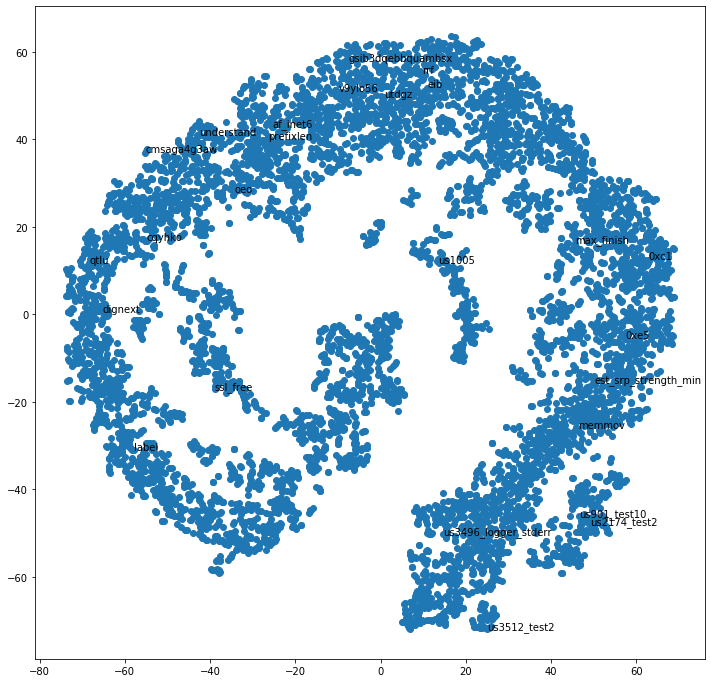

In [ ]:
%matplotlib inline
plot_with_matplotlib(x_vals, y_vals, labels)

# Training Doc2Vec for SE

Le and Mikolov in 2014 introduced the Doc2Vec algorithm, which usually outperforms such simple-averaging of Word2Vec vectors [(link)](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py).

PV-DM is analogous to Word2Vec CBOW. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a center word based an average of both context word-vectors and the full document’s doc-vector.

PV-DBOW is analogous to Word2Vec SG. The doc-vectors are obtained by training a neural network on the synthetic task of predicting a target word just from the full document’s doc-vector. (It is also common to combine this with skip-gram testing, using both the doc-vector and nearby word-vectors to predict a single target word, but only one at a time.)

In [ ]:
import math as m
import gensim
import collections
import random as r

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
path = get_tmpfile("test_data/models/doc2vec_libest.model")

In [ ]:
artifacts = pd.read_csv('/tf/main/benchmarking/traceability/testbeds/nltk/[libest-pre-all].csv')

In [ ]:
texts = [doc.split() for doc in list(artifacts['0'])]
texts

[['unit',
  'test',
  'user',
  'stori',
  'server',
  'simpl',
  'enrol',
  'august',
  'copyright',
  'cisco',
  'system',
  'inc',
  'right',
  'reserv',
  'includ',
  'stdio',
  'ifndef',
  'win',
  'includ',
  'unistd',
  'endif',
  'includ',
  'est',
  'includ',
  'curl',
  'curl',
  'includ',
  'curl',
  'util',
  'includ',
  'test',
  'util',
  'includ',
  'server',
  'includ',
  'openssl',
  'ssl',
  'ifdef',
  'cunit',
  'includ',
  'cunit',
  'basic',
  'includ',
  'cunit',
  'autom',
  'endif',
  'ifndef',
  'win',
  'static',
  'char',
  'test',
  'outfil',
  'filenam',
  'max',
  'test',
  'hdr',
  'defin',
  'cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'explicit_cert',
  'us903',
  'cert',
  'pem',
  'defin',
  'us903_explicit_key',
  'us903',
  'key',
  'pem',
  'defin',
  'us903_cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'us903_trusted_cert',
  'trustedcert',
  'crt',
  'defin',
  'est',
  'privat',
  'estservercertandkey',
  'pem',
  'els',
  'static'

In [ ]:
s = m.floor(len(texts)*0.1)

In [ ]:
test_corpus = [i[1] for i in enumerate(texts[:s])]

In [ ]:
test_corpus[:1]

[['unit',
  'test',
  'user',
  'stori',
  'server',
  'simpl',
  'enrol',
  'august',
  'copyright',
  'cisco',
  'system',
  'inc',
  'right',
  'reserv',
  'includ',
  'stdio',
  'ifndef',
  'win',
  'includ',
  'unistd',
  'endif',
  'includ',
  'est',
  'includ',
  'curl',
  'curl',
  'includ',
  'curl',
  'util',
  'includ',
  'test',
  'util',
  'includ',
  'server',
  'includ',
  'openssl',
  'ssl',
  'ifdef',
  'cunit',
  'includ',
  'cunit',
  'basic',
  'includ',
  'cunit',
  'autom',
  'endif',
  'ifndef',
  'win',
  'static',
  'char',
  'test',
  'outfil',
  'filenam',
  'max',
  'test',
  'hdr',
  'defin',
  'cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'explicit_cert',
  'us903',
  'cert',
  'pem',
  'defin',
  'us903_explicit_key',
  'us903',
  'key',
  'pem',
  'defin',
  'us903_cacert',
  'est',
  'cacert',
  'crt',
  'defin',
  'us903_trusted_cert',
  'trustedcert',
  'crt',
  'defin',
  'est',
  'privat',
  'estservercertandkey',
  'pem',
  'els',
  'static'

In [ ]:
train_corpus = [gensim.models.doc2vec.TaggedDocument(i[1], [i[0]]) for i in enumerate(texts[s:])]

In [ ]:
train_corpus[:1]

[TaggedDocument(words=['unit', 'test', 'user', 'stori', 'proxi', 'cacert', 'novemb', 'copyright', 'cisco', 'system', 'inc', 'right', 'reserv', 'proxi', 'mode', 'primarili', 'server', 'mode', 'process', 'certain', 'request', 'client', 'pass', 'long', 'upstream', 'server', 'use', 'client', 'mode', 'function', 'case', 'get', 'cacert', 'proxi', 'mode', 'function', 'almost', 'ident', 'server', 'mode', 'cert', 'respons', 'chain', 'pass', 'sent', 'repli', 'get', 'cacert', 'request', 'downstream', 'client', 'test', 'code', 'taken', 'larg', 'server', 'get', 'cacert', 'includ', 'stdio', 'ifndef', 'win', 'includ', 'unistd', 'endif', 'includ', 'est', 'includ', 'curl', 'curl', 'includ', 'curl', 'util', 'includ', 'test', 'util', 'includ', 'openssl', 'ssl', 'includ', 'server', 'includ', 'proxi', 'ifdef', 'cunit', 'includ', 'cunit', 'basic', 'includ', 'cunit', 'autom', 'endif', 'defin', 'pkcs', 'req', 'miichj', 'ccaw4caqaw', 'qtel', 'mcmga1ueax', 'mccm', 'igj5ignsa', 'wvud', 'cbpbi', 'zw1v', 'ihn0', '

In [ ]:
#min_count -> infrequent words are ignored (less than 2)
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=50) #Parameters

2020-05-02 02:19:07,685 : WARNING : consider setting layer size to a multiple of 4 for greater performance


In [ ]:
model.build_vocab(train_corpus) #Building the vocabulary

2020-05-02 02:19:47,684 : INFO : collecting all words and their counts
2020-05-02 02:19:47,686 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2020-05-02 02:19:47,702 : INFO : collected 6359 word types and 79 unique tags from a corpus of 79 examples and 71978 words
2020-05-02 02:19:47,703 : INFO : Loading a fresh vocabulary
2020-05-02 02:19:47,712 : INFO : effective_min_count=2 retains 4160 unique words (65% of original 6359, drops 2199)
2020-05-02 02:19:47,714 : INFO : effective_min_count=2 leaves 69779 word corpus (96% of original 71978, drops 2199)
2020-05-02 02:19:47,725 : INFO : deleting the raw counts dictionary of 6359 items
2020-05-02 02:19:47,727 : INFO : sample=0.001 downsamples 57 most-common words
2020-05-02 02:19:47,727 : INFO : downsampling leaves estimated 57528 word corpus (82.4% of prior 69779)
2020-05-02 02:19:47,736 : INFO : estimated required memory for 4160 words and 50 dimensions: 3759800 bytes
2020-05-02 02:19:47,737 : INFO : reset

In [ ]:
model.wv.vocab

{'unit': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00d68>,
 'test': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00828>,
 'user': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00c18>,
 'stori': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00f28>,
 'proxi': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00e80>,
 'cacert': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00b00>,
 'novemb': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00ba8>,
 'copyright': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00da0>,
 'cisco': <gensim.models.keyedvectors.Vocab at 0x7fd7feb007b8>,
 'system': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00dd8>,
 'inc': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00e48>,
 'right': <gensim.models.keyedvectors.Vocab at 0x7fd7feb009e8>,
 'reserv': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00f60>,
 'mode': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00fd0>,
 'server': <gensim.models.keyedvectors.Vocab at 0x7fd7feb00860>,
 'process': <gensim.models.keyedvecto

In [ ]:
print(model.corpus_count,model.epochs)

79 50


In [ ]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs) #Training the model

2020-05-02 02:24:15,189 : INFO : training model with 3 workers on 4160 vocabulary and 50 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-05-02 02:24:15,247 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:15,251 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:15,254 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-02 02:24:15,255 : INFO : EPOCH - 1 : training on 71978 raw words (57585 effective words) took 0.1s, 999982 effective words/s
2020-05-02 02:24:15,302 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:15,304 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:15,308 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-02 02:24:15,309 : INFO : EPOCH - 2 : training on 71978 raw words (57503 effective words) took 0.1s, 1131623 effective words/s
2020-05-02 02:24:15,356 : INFO : worker

2020-05-02 02:24:16,334 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:16,336 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:16,341 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-02 02:24:16,341 : INFO : EPOCH - 21 : training on 71978 raw words (57631 effective words) took 0.0s, 1209954 effective words/s
2020-05-02 02:24:16,384 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:16,387 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:16,391 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-02 02:24:16,392 : INFO : EPOCH - 22 : training on 71978 raw words (57575 effective words) took 0.0s, 1188105 effective words/s
2020-05-02 02:24:16,440 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:16,442 : INFO : worker thread finished; awaiting finish of 1 more threads
20

2020-05-02 02:24:17,431 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:17,432 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-02 02:24:17,433 : INFO : EPOCH - 41 : training on 71978 raw words (57602 effective words) took 0.1s, 1147310 effective words/s
2020-05-02 02:24:17,475 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:17,482 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:17,484 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-02 02:24:17,484 : INFO : EPOCH - 42 : training on 71978 raw words (57639 effective words) took 0.0s, 1169380 effective words/s
2020-05-02 02:24:17,526 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-02 02:24:17,530 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-02 02:24:17,536 : INFO : worker thread finished; awaiting finish of 0 more threads
20

In [ ]:
vector = model.infer_vector(['only', 'gen', 'can', 'prevent', 'dir', 'suit'])
print(vector)

[-3.8799790e-01 -1.0759743e-01 -8.5099328e-01 -1.6261047e-01
 -4.6120614e-01 -4.1150653e-01 -4.8968711e-01 -1.5730537e-01
 -6.8020940e-01  3.0621865e-01  5.4173124e-01  2.5272253e-01
 -5.0421804e-01  2.3174997e-01 -9.8899305e-03 -6.3132226e-01
  1.8082513e-01 -9.5351160e-02  3.0821612e-01 -1.1720957e-02
  5.0217199e-01 -3.4657633e-01 -3.1743407e-02 -4.2242369e-01
  2.9581904e-01 -3.9127624e-01 -3.9710104e-01 -2.1949653e-01
 -7.2293822e-04 -6.3064796e-01  2.5287136e-01 -2.2371596e-01
 -1.9622575e-02 -6.2112415e-01  2.9001772e-01 -1.8906260e-01
 -1.1596942e-01 -2.4680687e-01  6.5607691e-01  7.7220105e-02
 -4.2044306e-01  2.7088323e-01  2.2468549e-01 -4.5313707e-01
  6.5325224e-01  6.1260074e-01 -2.9224026e-01 -3.3492854e-01
 -4.5888122e-02  4.1145048e-01]


## Assesing the model

In [ ]:
print(len(model.docvecs))

79


In [ ]:
#Self-similarity assessment
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

2020-05-02 02:54:48,078 : INFO : precomputing L2-norms of doc weight vectors


In [ ]:
rank

0

Checking the inferred-vector against a training-vector is a sort of ‘sanity check’ as to whether the model is behaving in a usefully consistent manner, though not a real ‘accuracy’ value.

In [ ]:
counter = collections.Counter(ranks)
print(counter)

Counter({0: 79})


In [ ]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Document (78): «util function set certif privat key use ssl context return success int est client set cert key ssl ctx ctx cert evp pkey key ssl ctx use certif ctx cert est log err error set certif ossl dump ssl error return ssl ctx use privat key ctx key est log err unabl set privat key ossl dump ssl error return verifi key match cert ssl ctx check privat key ctx est log err privat key match certif public key ossl dump ssl error return return sign certif request use digest key pass return open ssl error code req sign ctx static int est client req sign req evp pkey pkey const evp int evp pkey ctx pkctx null evp ctx mctx evp ctx init mctx evp digest sign init mctx pkctx null pkey return encod use der asn set modifi flag req open ssl keep cach copi der encod data case set flag tell open ssl run asn encod rather use cach copi req info enc modifi req sign ctx mctx evp ctx cleanup mctx return popul request build request buffer call open ssl insert field header paramet req pointer buffer hol

In [ ]:
#Pick a random artifact from the corpus and infer a vector from the model
doc_id = r.randint(0, len(train_corpus) -1 )

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (12): «unit test user stori proxi csr attribut novemb copyright cisco system inc right reserv includ stdio ifndef win includ unistd endif includ est includ curl curl includ curl util includ test util includ server includ proxi includ openssl ssl ifdef cunit includ cunit basic includ cunit autom endif static unsign char cacert null static int cacert len defin server port defin proxi port ifndef win32 defin us895_cacert est cacert crt defin us895_trusted_cert trustedcert crt defin server_ut_cacert est cacert crt defin server_ut_pubkey "./ defin us895_server_ip 127 defin us895_cacert est cacert crt defin us895_trust_cert trustedcert crt defin us895_server_certkey est privat estservercertandkey pem els defin us895_cacert est cacert crt defin us895_trusted_cert trustedcert crt defin server_ut_cacert est cacert crt defin server_ut_pubkey defin us895_server_ip 127 defin us895_cacert est cacert crt defin us895_trust_cert trustedcert crt defin us895_server_certkey est privat ests

## Testing the Model

In [ ]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = r.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

In [ ]:
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id][:10])))

Test Document (6): «unit test user stori server csr attribut novemb copyright cisco»



In [ ]:
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words[:10])))

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d50,n5,w5,mc2,s0.001,t3):

MOST (12, 0.9810036420822144): «unit test user stori proxi csr attribut novemb copyright cisco»

MEDIAN (56, 0.38102012872695923): «requir certif less tls mutual authent certif less tls cipher»

LEAST (73, 0.11676022410392761): «static pthread pthread self void return get current thread const»



In [ ]:
# Compare and print the most/median/least similar documents from the train corpus
train_corpus[0].words[:10]


['unit',
 'test',
 'user',
 'stori',
 'proxi',
 'cacert',
 'novemb',
 'copyright',
 'cisco',
 'system']

In [ ]:
sims

[(12, 0.9810036420822144),
 (21, 0.6884981989860535),
 (9, 0.5918947458267212),
 (68, 0.5753606557846069),
 (52, 0.5392025709152222),
 (18, 0.5295883417129517),
 (3, 0.5292444825172424),
 (59, 0.5173074007034302),
 (49, 0.5140671730041504),
 (16, 0.5124859809875488),
 (58, 0.5044164061546326),
 (39, 0.4976922869682312),
 (6, 0.48437297344207764),
 (34, 0.484132319688797),
 (30, 0.48238879442214966),
 (37, 0.4719356298446655),
 (44, 0.46915438771247864),
 (27, 0.46722957491874695),
 (26, 0.46127328276634216),
 (45, 0.4586990475654602),
 (32, 0.45810696482658386),
 (41, 0.4577290415763855),
 (2, 0.4567633271217346),
 (5, 0.44989198446273804),
 (53, 0.43817898631095886),
 (35, 0.433898389339447),
 (31, 0.42919060587882996),
 (50, 0.4239356219768524),
 (10, 0.4221436679363251),
 (64, 0.41688331961631775),
 (40, 0.41674649715423584),
 (19, 0.41365566849708557),
 (20, 0.40575116872787476),
 (38, 0.4030345678329468),
 (47, 0.40228399634361267),
 (65, 0.3991203010082245),
 (29, 0.3930937051773